<a href="https://colab.research.google.com/github/asusatijo/DS-2002-Assignments/blob/main/sqliteHW_Susatijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 1
import sqlite3 as sq
student_grades=sq.connect('student_grades.db')
cursor = student_grades.cursor()

# 2
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')

# 3
students = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
    INSERT INTO students (first_name, last_name)
    VALUES (?, ?)
''', students)

grades = [
        (1, 'Math', 95),
        (1, 'English', 88),
        (1, 'History', 90),
        (2, 'Math', 82),
        (2, 'English', 76),
        (2, 'History', 85),
        (3, 'Math', 91),
        (3, 'English', 84),
        (3, 'History', 87),
        (4, 'Math', 78),
        (4, 'English', 82),
        (4, 'History', 80),
        (5, 'Math', 89),
        (5, 'English', 90),
        (5, 'History', 85)
    ]

cursor.executemany('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (?, ?, ?)
''', grades)

student_grades.commit()

In [20]:
#Q1
cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    ORDER BY s.last_name, s.first_name, g.subject
''')
results = cursor.fetchall()
for row in results:
    print(row)

('David', 'Brown', 'English', 82)
('David', 'Brown', 'English', 82)
('David', 'Brown', 'English', 82)
('David', 'Brown', 'History', 80)
('David', 'Brown', 'History', 80)
('David', 'Brown', 'History', 80)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'Math', 78)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History', 85)
('Eve', 'Davis', 'History', 85)
('Eve', 'Davis', 'History', 85)
('Eve', 'Davis', 'Math', 89)
('Eve', 'Davis', 'Math', 89)
('Eve', 'Davis', 'Math', 89)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smit

In [21]:
#Q2
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
''')
results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 87.33333333333333)
('David', 'Brown', 80.0)
('Eve', 'Davis', 88.0)


In [22]:
#Q3
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
    ORDER BY average_grade DESC
    LIMIT 1
''')
results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson', 91.0)


In [23]:
#Q4

cursor.execute('''
    SELECT AVG(grade)
    FROM grades
    WHERE subject = 'Math'
''')
result = cursor.fetchone()
print(result)


(87.0,)


In [24]:
#Q5

cursor.execute('''
    SELECT s.first_name, s.last_name
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    WHERE g.grade > 90
''')
results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson')
('Carol', 'White')
('Alice', 'Johnson')
('Carol', 'White')
('Alice', 'Johnson')
('Carol', 'White')


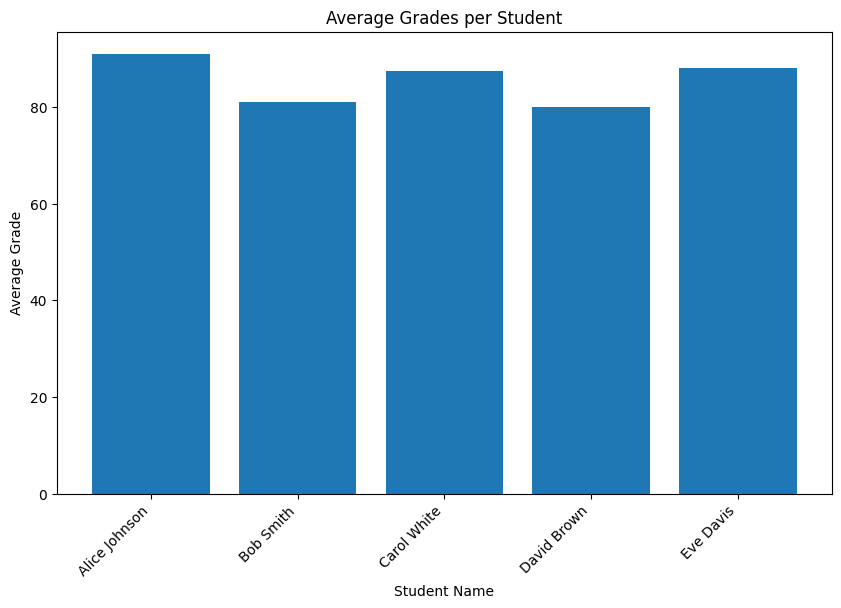

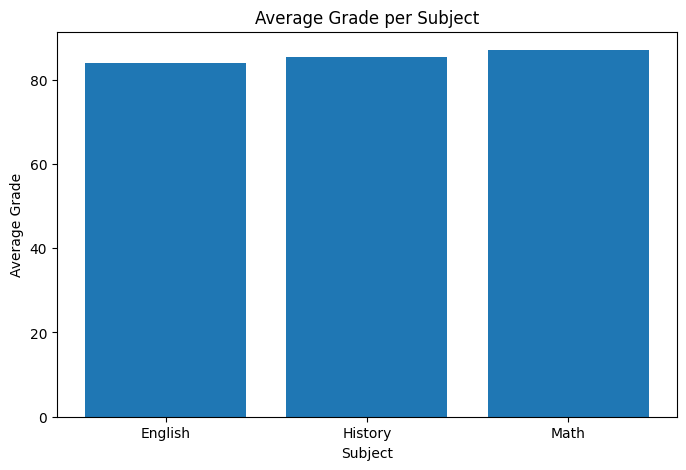

In [25]:
#5

import pandas as pd
import matplotlib.pyplot as plt

students_df = pd.read_sql_query("SELECT * FROM students", student_grades)
grades_df = pd.read_sql_query("SELECT * FROM grades", student_grades)

merged_df = pd.merge(students_df, grades_df, on='student_id')

average_grades = merged_df.groupby(['first_name', 'last_name'])['grade'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_grades.index.map(lambda x: f"{x[0]} {x[1]}"), average_grades.values)
plt.xlabel("Student Name")
plt.ylabel("Average Grade")
plt.title("Average Grades per Student")
plt.xticks(rotation=45, ha="right")
plt.show()

subject_avg_grades = merged_df.groupby('subject')['grade'].mean()
plt.figure(figsize=(8, 5))
plt.bar(subject_avg_grades.index, subject_avg_grades.values)
plt.xlabel("Subject")
plt.ylabel("Average Grade")
plt.title("Average Grade per Subject")
plt.show()

('Eve', 'Davis', 'English', 90)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'Math', 95)


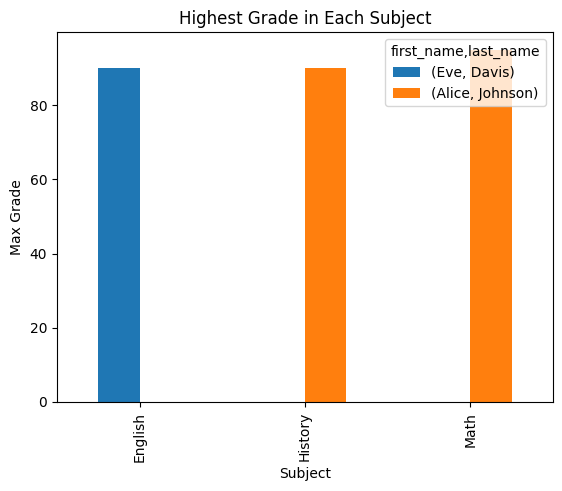

In [26]:
#Bonus

cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS max_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY g.subject
''')
results = cursor.fetchall()
for row in results:
    print(row)

top_students_df = pd.read_sql_query('''
    SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS max_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY g.subject
''', student_grades)

top_students_df.pivot(index='subject', columns=['first_name', 'last_name'], values='max_grade').plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Max Grade")
plt.title("Highest Grade in Each Subject")
plt.show()